In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/AIM_WORK/rez_work/archive.zip', 'r') as zips:
    zips.extractall(path="data/")

## Предобработка данных

Данные состоят из двух характеристик - последовательность ДНК в строковом виде и класс, к которому относится последовательнсть

In [ ]:
human_data = pd.read_table('data/human.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


В данных нет пропусков, для всех последовательностей определены классы

In [ ]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


Для классификации необходимо преобразовать представление последовательностей. Основываясь на k-мерном подсчете, с помощью которого оценивается качество сборки генома на основе частот k-мерных подстрок последовательности, разделим каждую последовательность на слова по 6 символов. Последовательности слов преобразуем в цифровой формат при помощи CountVectorizer, который строит частотные словари и на его основе представляет текст в виде векторов.

In [ ]:
# функция для преобразования строк последовательности в k-мерные слова

def getKmers(sequence , size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
# преобразование обучающей последовательности данных в короткие перекрывающиеся k-мерные файлы длиной 6

human_data['words'] = human_data.apply(lambda x : getKmers(x['sequence']) , axis = 1)
human_data = human_data.drop('sequence' , axis = 1)

In [ ]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
# преобразование списка k-мер для каждого гена в строковые предложения из слов, которые может использовать СountVectorizer

human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[: , 0].values

In [ ]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [ ]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [ ]:
# Применение набора слов с помощью CountVectorizer с использованием NLP

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(human_texts)

В результате в качестве множества классифицируемых объектов выступает множество векторизованных последовательностей ДНК

In [ ]:
print(X.shape)

(4380, 232414)


In [ ]:
print(*X.toarray()[0])

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Распределение данных по классам

Объектов класса 6 сильно больше объектов других классов, то есть выборка не совсем сбалансирована. Учитывая это в качестве оценки обучения будем использовать F-меру, так как оценки точности и полноты не зависят от соотношения классов выборки.

<Axes: xlabel='class'>

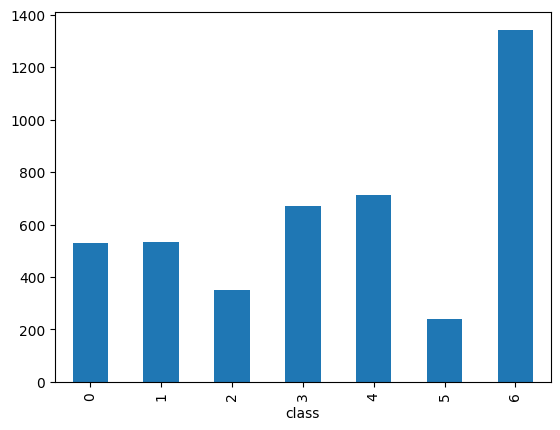

In [ ]:
# Сбалансирован ли набор данных

human_data['class'].value_counts().sort_index().plot.bar()

## Обучнеие классификатора

In [ ]:
# Разделение набора данных на обучающий набор и тестовый набор

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y_data, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


Соотношение классов в тестовой и обучающей выборке примерно одинаковое

In [ ]:
train_classes = pd.Series(y_train).value_counts() / len(y_train) * 100
test_classes = pd.Series(y_test).value_counts() / len(y_test) * 100
print(f'class train   test')
for index, train_, test_ in zip(train_classes.sort_index().index, train_classes.sort_index(), test_classes.sort_index()):
    print(f'{index:^5} {train_:^3.0f} % - {test_:^2.0f} %')

class train   test
  0   12  % - 12 %
  1   12  % - 12 %
  2    8  % - 9  %
  3   16  % - 14 %
  4   16  % - 17 %
  5    5  % - 6  %
  6   31  % - 30 %


### KNeighbors Classifier

В алгоритме k ближайших соседей проверим значения k от 1 до 5. В качестве оценки выступает F-мера, как было сказано выше

In [ ]:
# Knn Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid_param = {'n_neighbors': range(1, 6)}
knn_model = GridSearchCV(estimator=knn, param_grid=grid_param, scoring='f1_weighted', cv=5)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 6)}, scoring='f1_weighted')

In [ ]:
print(knn_model.best_params_)

{'n_neighbors': 1}


In [ ]:
knn_y_pred = knn_model.predict(X_test)

В качестве оценки выведем метрики accuracy, precision, recall, f1-score, confusion matrix

In [ ]:
# Анализ показателей эффективности модели
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score, confusion_matrix, ConfusionMatrixDisplay

def get_metrics(y_test , y_predicted):
    accuracy = accuracy_score(y_test , y_predicted)
    precision = precision_score(y_test , y_predicted , average = "weighted")
    recall = recall_score(y_test , y_predicted , average = "weighted")
    f1 = f1_score(y_test , y_predicted , average = "weighted")
    return accuracy , precision , recall , f1

accuracy = 0.858 
precision = 0.926 
recall = 0.858 
f1 = 0.874 



Text(0.5, 1.0, 'Confusion Matrix')

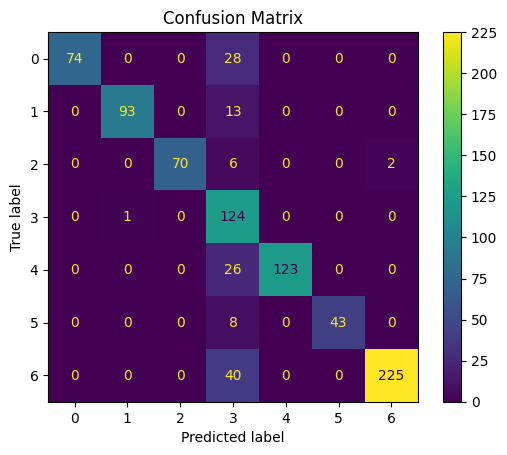

In [ ]:


knn_accuracy , knn_precision , knn_recall , knn_f1 = get_metrics(y_test , knn_y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f \n" % (knn_accuracy , knn_precision , knn_recall , knn_f1))

model_matrix_ = confusion_matrix(y_test, knn_y_pred, labels=[0, 1, 2, 3, 4, 5, 6])
model_mat_plt_ = ConfusionMatrixDisplay(confusion_matrix=model_matrix_)
model_mat_plt_.plot()
plt.title('Confusion Matrix')